<a href="https://colab.research.google.com/github/dayanebravo/AED/blob/main/AED_AP_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados - AED** - **Aula Prática 05**

> Importar bibliotecas e dados

In [ ]:
import pandas as pd  # biblioteca com ferramentas para análise de dados/dataframes
import numpy as np  # biblioteca com operações matemáticas

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dayanebravo/AED/main/pes_2012.csv")  # ler dados no formato CSV
df1.head()  #  exibe as primeiras linhas da tabela

In [ ]:
df1["V4718"] = pd.to_numeric(df1["V4718"],errors="coerce")  # transformar dados da coluna em float e os erros substituir por NaN
df1["V4720"] = pd.to_numeric(df1["V4720"],errors="coerce")

In [ ]:
df = df1.dropna()  # criando um NOVO dataframe com as linhas inválidas removidas
df.head()  #  exibe as primeiras linhas da tabela

# **Medidas de Tendência Central: Dados Descritivos**

> **Mediana, média e moda**

In [ ]:
df.UF.mode()   # moda

In [ ]:
#  np.mean(df.V0302)  #  NÃO FUNCIONA!!!
k=df.V0302.value_counts()
np.mean(k)  # sexo (V0302) - média ERRADA!!!

In [ ]:
df.groupby('V0302').agg({"V4720": "mean"})  # agrupa dados por sexo (V0302) agregando pela renda média (V4720)

In [ ]:
df.groupby('V0302').agg({"V4720": "median"})  # agrupa dados por sexo (V0302) agregando pela mediana das rendas (V4720)

In [ ]:
tabela = df.groupby(['UF','V0302']).agg({'V8005': np.mean})  # agrupa: sexo / UF / idade média
#tabela.reset_index(inplace=True)  # preenche todas as linhas da coluna
tabela

## **Quartil**

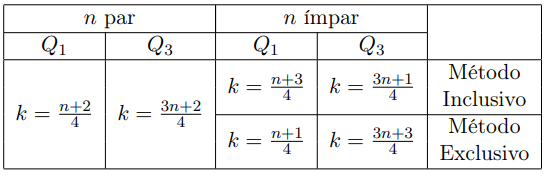

In [ ]:
dfo = sorted(df.V8005)  # ordena a coluna analisada 
n=len(dfo)  # tamanho da coluna

Q1=int((n+3)/4)  # fórmula posição primeiro quartil
Q3=int((3*n+1)/4)  # fórmula posição terceiro quartil

print("A posição do primeiro quartil é: ", Q1, "e do terceiro quartil é: " ,Q3)  # aqui encontramos a posição
print("O valor do primeiro quartil é: ", dfo[Q1], "e do terceiro quartil é: ", dfo[Q3])  # aqui encontramos o valor associado àquela posição

In [ ]:
print("O valor de Q1 é: ", np.quantile(df.V8005, .25))   # usa a função da np para encontrar o valor do quartil
print("O valor de Q3 é: : ", np.quantile(df.V8005, .75))  # usa a função da np para encontrar o valor do quartil

>**Intervalo Interquartil**

In [ ]:
k = Q3-Q1  # fórmula
print("A posição do primeiro quartil é: ", Q1, "e do terceiro quartil é: " ,Q3, 
      "\n Portanto o intervalo interquartil é: ", k)

## **Percentil**
>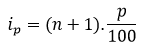

In [ ]:
n=len(dfo)  # tamanho da coluna
p=int(input("Qual percentil quer calcular? "))  # entrada informada pelo usuário

ip=int((n+1)*p/100)  # fórmula posição percentil

print("A posição do percentil é: ", ip, "e o valor do percentil é: " ,dfo[ip])  # dada a posição, informa o dado referente

In [ ]:
p=int(input("Qual percentil quer calcular? "))  # entrada informada pelo usuário
print('o valor do percentil é: ', np.percentile(df.V8005, p))  # usa a função da np para encontrar o valor do percentil 

## **Medidas de dispersão**
> **Amplitude**

In [ ]:
k = df['V8005'].max()-df['V8005'].min()  # fórmula
print("A maior idade é: ", df['V8005'].max(), "e a menor: ", df['V8005'].min(), 
      "\n Portanto a amplitude é: ", k)

> **Desvio Médio Absoluto**
>>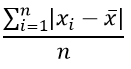

In [ ]:
def somatorio(x): # criar uma função que precisa de uma entrada x
    if x==1:
        return 1  # para x=1 retorna a saída e encerra a função
    else:  # caso x diferente de 1
        return abs(x-k) + somatorio(x-1) # retorna o termo subtraído da média em valor absoluto e soma ao seu antecessor

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
k = int(input("O valor médio dos dados é: "))  # informar a média
print("Resultado do desvio absoluto da média: ", somatorio(x)/x )  # print do desvio médio absoluto

In [ ]:
x = df.V8005  # construir a entrada x
k = df.V8005.mean()  # calcular a média
n = len(df.V8005)  # tamanho da entrada

def dm(x): # criar uma função que precisa de uma entrada x
  aux = np.array(abs(x-k))  # auxiliar que monta um vetor com a entrada subtraída da média em valor absoluto
  return aux.sum()/n  # saída da função: soma dos termos do vetor aux dividida por n

print("Resultado do desvio absoluto da média: ", dm(x) )  # print do desvio médio absoluto

## **Variância e Desvio Padrão**

> **Variância**
>> 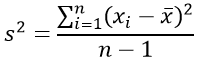

In [ ]:
x = df.V8005  # construir a entrada x
k = df.V8005.mean()  # calcular a média
n = len(df.V8005)  # tamanho da entrada

def dmv(x): # criar uma função que precisa de uma entrada x
  aux = np.array((x-k)**2)  # auxiliar que monta um vetor com a entrada subtraída da média elevada ao quadrado
  return aux.sum()/(n-1)  # saída da função: soma dos termos do vetor aux dividida por (n-1)

print("Resultado da variância: ", dmv(x) )  # informa o resultado da variância

In [ ]:
df.var()

> **Desvio padrão**
>> 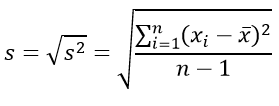

In [ ]:
x = df.V8005  # construir a entrada x
k = df.V8005.mean()  # calcular a média
n = len(df.V8005)  # tamanho da entrada

def dmv(x): # criar uma função que precisa de uma entrada x
  aux = np.array((x-k)**2)  # auxiliar que monta um vetor com a entrada subtraída da média elevada ao quadrado
  return aux.sum()/(n-1)  # saída da função: soma dos termos do vetor aux dividida por (n-1)

print("Resultado do desvio padrão: ", np.sqrt(dmv(x)) )  # informa o resultado do desvio padrão

In [ ]:
df.std()

In [ ]:
df.describe()

# **Próxima aula...**
> **Coeficientes de variação**

> **Gráficos diversos**